In [1]:
from quantileRegression import quantileRegression
import pandas as pd
import numpy as np
import sys
import ROOT as rt


Welcome to ROOTaaS 6.06/02


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR" ,
         'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']

# Input variables used for the regression
x = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list

In [3]:
# Initialize the quantile regression object for mc
qr_mc = quantileRegression("mc")

# This is what you want to correct
print "Load the mc dataframe"
startEvtmc = 2000001
stopEvtmc  = 3000000
qr_mc.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v3_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYToEE_powheg_13TeV_EBHighR9", "DYToEE_powheg_13TeV_EBLowR9", "DYToEE_powheg_13TeV_EEHighR9", "DYToEE_powheg_13TeV_EELowR9" ],
              startEvtmc, stopEvtmc, 12345)

Load the mc dataframe
NT branches: 
['rho', 'nvtx', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'leadScEnergy', 'leadCovarianceIetaIphi', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadScPreshowerEnergy', 'leadPhoIDMVA', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR', 'subleadScEnergy', 'subleadCovarianceIetaIphi', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'leadScPreshowerEnergy', 'subLeadPhoIDMVA']
['cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13T

In [4]:
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]
qr_mc.correctAllY(x, ylist, quantiles)

Loading corrected targets from :  correctedTargets.h5


In [5]:
dfmc     = qr_mc.getDF()
dfmcEB   = dfmc  .query('-1.444 < ScEta and ScEta <1.444') 
dfmcEE   = dfmc  .query('ScEta < -1.57 or ScEta >1.57  ') 

In [6]:
# Plot data, mc, mc_corrr
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = 1000000
print "Load the data dataframe"
qr_data.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v3_ichep/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata)

Load the data dataframe
NT branches: 
['rho', 'nvtx', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'leadScEnergy', 'leadCovarianceIetaIphi', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadScPreshowerEnergy', 'leadPhoIDMVA', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR', 'subleadScEnergy', 'subleadCovarianceIetaIphi', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'leadScPreshowerEnergy', 'subLeadPhoIDMVA']
['cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  c

In [7]:
dfdata = qr_data.getDF()
dfEB   = dfdata  .query('-1.444 < ScEta & ScEta <1.444') 
dfEE   = dfdata  .query('ScEta < -1.57 | ScEta >1.57  ') 

In [8]:
rt.gROOT.LoadMacro("phoIDMVAonthefly.C")

0

In [9]:
a = rt.phoIDInput()

In [10]:
readerEB = rt.bookReadersEB("./phoIDMVAweights/MVAweights_80X_barrel_ICHEPvtx.xml", a)
readerEE = rt.bookReadersEE("./phoIDMVAweights/MVAweights_80X_endcap_ICHEPvtx.xml", a)

In [11]:
# XEB = dfEB.loc[:,['ScEnergy','ScEta','rho','R9','SigmaIeIe','PhiWidth','EtaWidth','CovarianceIetaIphi','S4','PhoIso03','ChIso03','ChIso03worst','SigmaRR','ScPreshowerEnergy']]
# XEE = dfEE.loc[:,['ScEnergy','ScEta','rho','R9','SigmaIeIe','PhiWidth','EtaWidth','CovarianceIetaIphi','S4','PhoIso03','ChIso03','ChIso03worst','SigmaRR','ScPreshowerEnergy']]
# print X

In [12]:
def applyMVAEB(X):     
     a.phoIdMva_SCRawE_          = X['ScEnergy']
     a.phoIdMva_ScEta_           = X['ScEta']
     a.phoIdMva_rho_             = X['rho']
     a.phoIdMva_R9_              = X["R9"]
     a.phoIdMva_covIEtaIEta_     = X['SigmaIeIe'] # this is really sieie
     a.phoIdMva_PhiWidth_        = X['PhiWidth']
     a.phoIdMva_EtaWidth_        = X['EtaWidth']
     a.phoIdMva_covIEtaIPhi_     = X['CovarianceIetaIphi']
     a.phoIdMva_S4_              = X['S4']
     a.phoIdMva_pfPhoIso03_      = X['PhoIso03']
     a.phoIdMva_pfChgIso03_      = X['ChIso03']
     a.phoIdMva_pfChgIso03worst_ = X['ChIso03worst']
     return readerEB.EvaluateMVA("BDT")

def applyMVAEE(X):     
     a.phoIdMva_SCRawE_          = X['ScEnergy']
     a.phoIdMva_ScEta_           = X['ScEta']
     a.phoIdMva_rho_             = X['rho']
     a.phoIdMva_R9_              = X["R9"]
     a.phoIdMva_covIEtaIEta_     = X['SigmaIeIe'] # this is really sieie
     a.phoIdMva_PhiWidth_        = X['PhiWidth']
     a.phoIdMva_EtaWidth_        = X['EtaWidth']
     a.phoIdMva_covIEtaIPhi_     = X['CovarianceIetaIphi']
     a.phoIdMva_S4_              = X['S4']
     a.phoIdMva_pfPhoIso03_      = X['PhoIso03']
     a.phoIdMva_pfChgIso03_      = X['ChIso03']
     a.phoIdMva_pfChgIso03worst_ = X['ChIso03worst']
     a.phoIdMva_ESEffSigmaRR_    = X['SigmaRR']
     esEn_                       = X['ScPreshowerEnergy']
     ScEn_                       = X['ScEnergy']
     a.phoIdMva_esEnovSCRawEn_   = esEn_/ScEn_
     return readerEE.EvaluateMVA("BDT")
    
    

def applyMVAEBcorr(X):
    a.phoIdMva_SCRawE_          = X['ScEnergy']
    a.phoIdMva_ScEta_           = X['ScEta']
    a.phoIdMva_rho_             = X['rho']
    a.phoIdMva_R9_              = X["R9_corr"]
    a.phoIdMva_covIEtaIEta_     = X['SigmaIeIe_corr'] # this is really sieie
    a.phoIdMva_PhiWidth_        = X['PhiWidth_corr']
    a.phoIdMva_EtaWidth_        = X['EtaWidth_corr']
    a.phoIdMva_covIEtaIPhi_     = X['CovarianceIetaIphi_corr']
    a.phoIdMva_S4_              = X['S4_corr']
    a.phoIdMva_pfPhoIso03_      = X['PhoIso03']
    a.phoIdMva_pfChgIso03_      = X['ChIso03']
    a.phoIdMva_pfChgIso03worst_ = X['ChIso03worst']
    return readerEB.EvaluateMVA("BDT")

def applyMVAEEcorr(X):
    a.phoIdMva_SCRawE_          = X['ScEnergy']
    a.phoIdMva_ScEta_           = X['ScEta']
    a.phoIdMva_rho_             = X['rho']
    a.phoIdMva_R9_              = X["R9_corr"]
    a.phoIdMva_covIEtaIEta_     = X['SigmaIeIe_corr'] # this is really sieie
    a.phoIdMva_PhiWidth_        = X['PhiWidth_corr']
    a.phoIdMva_EtaWidth_        = X['EtaWidth_corr']
    a.phoIdMva_covIEtaIPhi_     = X['CovarianceIetaIphi_corr']
    a.phoIdMva_S4_              = X['S4_corr']
    a.phoIdMva_pfPhoIso03_      = X['PhoIso03']
    a.phoIdMva_pfChgIso03_      = X['ChIso03']
    a.phoIdMva_pfChgIso03worst_ = X['ChIso03worst']
    a.phoIdMva_ESEffSigmaRR_    = X['SigmaRR']
    esEn_                       = X['ScPreshowerEnergy']
    ScEn_                       = X['ScEnergy']
    a.phoIdMva_esEnovSCRawEn_   = esEn_/ScEn_
    return readerEE.EvaluateMVA("BDT")


In [13]:
# dfmcEB['newPhoID'] = dfmcEB.apply(applyMVAEB, axis = 1)
dfmcEB.loc[:,('newPhoID')] = dfmcEB.apply(applyMVAEB, axis = 1)

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Applications/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
# dfmcEE['newPhoID'] = dfmcEE.apply(applyMVAEE, axis = 1)
dfmcEE.loc[:,('newPhoID')] = dfmcEE.apply(applyMVAEE, axis = 1)

In [15]:
# dfmcEB['newPhoIDcorr'] = dfmcEB.apply(applyMVAEBcorr, axis = 1)
dfmcEB.loc[:,('newPhoIDcorr')] = dfmcEB.apply(applyMVAEBcorr, axis = 1)

In [16]:
# dfmcEE['newPhoIDcorr'] = dfmcEE.apply(applyMVAEEcorr, axis = 1)
dfmcEE.loc[:,('newPhoIDcorr')] = dfmcEE.apply(applyMVAEEcorr, axis = 1)

In [17]:
# dfEB['newPhoID'] = dfEB.apply(applyMVAEB, axis = 1)
dfEB.loc[:,('newPhoID')] = dfEB.apply(applyMVAEB, axis = 1)

In [18]:
# dfEE['newPhoID'] = dfEE.apply(applyMVAEE, axis = 1)
dfEE.loc[:,('newPhoID')] = dfEE.apply(applyMVAEE, axis = 1)

In [19]:
# print dfmcEB
# print dfmcEE
# print dfEB
# print dfEE

In [20]:
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook
plt.style.use('ggplot')

<IPython.core.display.Javascript object>


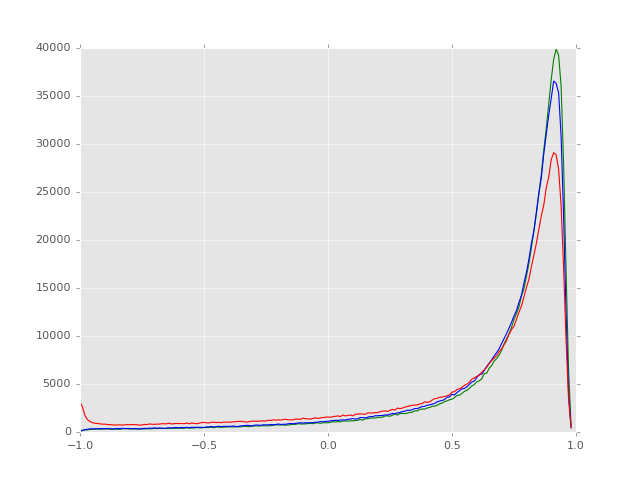

<IPython.core.display.Javascript object>


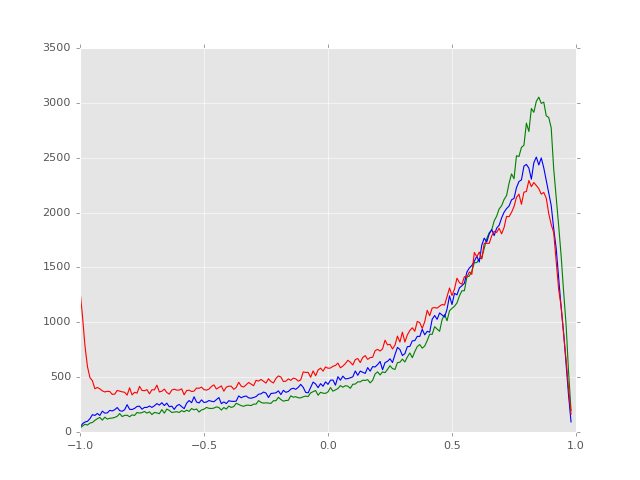

In [23]:
rv  = np.arange(-1.0,1.0,0.010)

fig = plt.figure()
ax = fig.add_subplot(111)

mc_bins, _edges = np.histogram(dfmcEB['newPhoID'], rv, normed = 0)
edges = _edges[:len(_edges)-1]
plt.plot(edges,mc_bins,"g")
mc_bins, _edges = np.histogram(dfmcEB['newPhoIDcorr'], rv, normed = 0)
edges = _edges[:len(_edges)-1]
plt.plot(edges,mc_bins,"b")
data_bins, _edges = np.histogram(dfEB['newPhoID'], rv, normed = 0)
edges = _edges[:len(_edges)-1]
plt.plot(edges,data_bins,"r")
# data_bins, _edges = np.histogram(dfEB['PhoIDMVA'], rv, normed = 1)
# edges = _edges[:len(_edges)-1]
# plt.plot(edges,data_bins,"black")

fig = plt.figure()
ax = fig.add_subplot(111)

mc_bins, _edges = np.histogram(dfmcEE['newPhoID'], rv, normed = 0)
edges = _edges[:len(_edges)-1]
plt.plot(edges,mc_bins,"g")
mc_bins, _edges = np.histogram(dfmcEE['newPhoIDcorr'], rv, normed = 0)
edges = _edges[:len(_edges)-1]
plt.plot(edges,mc_bins,"b")
data_bins, _edges = np.histogram(dfEE['newPhoID'], rv, normed = 0)
edges = _edges[:len(_edges)-1]
plt.plot(edges,data_bins,"r")
# data_bins, _edges = np.histogram(dfEE['PhoIDMVA'], rv, normed = 1)
# edges = _edges[:len(_edges)-1]
# plt.plot(edges,data_bins,"black")


# mc_bins, _edges = np.histogram(dfmcEE['newPhoID'], rv, normed = 1)
# edges = _edges[:len(_edges)-1]
# plt.plot(edges,mc_bins,"g")
# mc_bins, _edges = np.histogram(dfmcEE['PhoIDMVA'], rv, normed = 1)
# edges = _edges[:len(_edges)-1]
# plt.plot(edges,mc_bins,"b")



In [22]:
# print dfmcEB['PhoIDMVA']-dfmcEB['newPhoID']
print dfmcEE['PhoIDMVA']-dfmcEE['newPhoID']


5        -0.011822
10       -0.004307
11        0.082355
15       -0.004887
33       -0.023390
35        0.169264
45        0.005223
49       -0.022998
53        0.002827
58       -0.008152
59        0.003959
63       -0.091487
64        0.011808
67       -0.161683
86       -0.002157
92       -0.039355
100       0.079194
103       0.127571
114      -0.006317
117       0.012329
118      -0.023666
120       0.026790
121       0.076524
134       0.038902
135      -0.008112
146       0.003511
156       0.000031
160       0.072284
165       0.020785
166      -0.016562
            ...   
999769    0.027400
999776   -0.027260
999777   -0.027812
999778    0.042940
999795    0.123808
999803   -0.014298
999804   -0.009219
999811    0.014608
999814    0.196055
999820    0.003432
999824    0.000472
999831    0.006222
999837   -0.000308
999840    0.052747
999846   -0.049587
999851    0.099192
999862    0.015216
999864   -0.013960
999868   -0.057771
999879    0.014645
999893    0.117762
999897    0.